       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00  
Number of rows: 110023
Number of columns: 13
<class 'pandas.core.fram

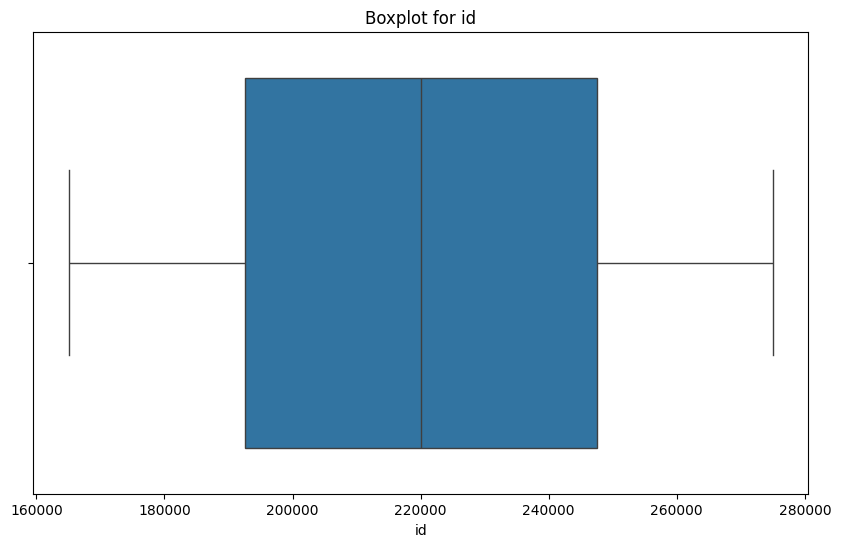

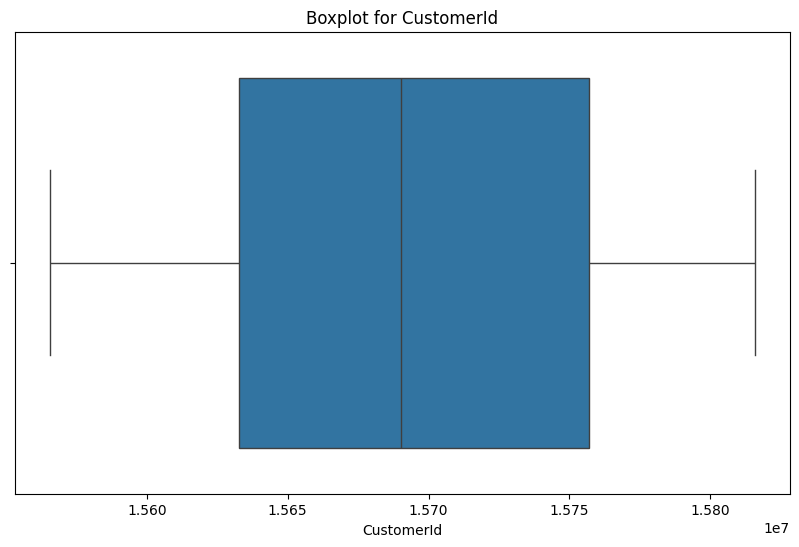

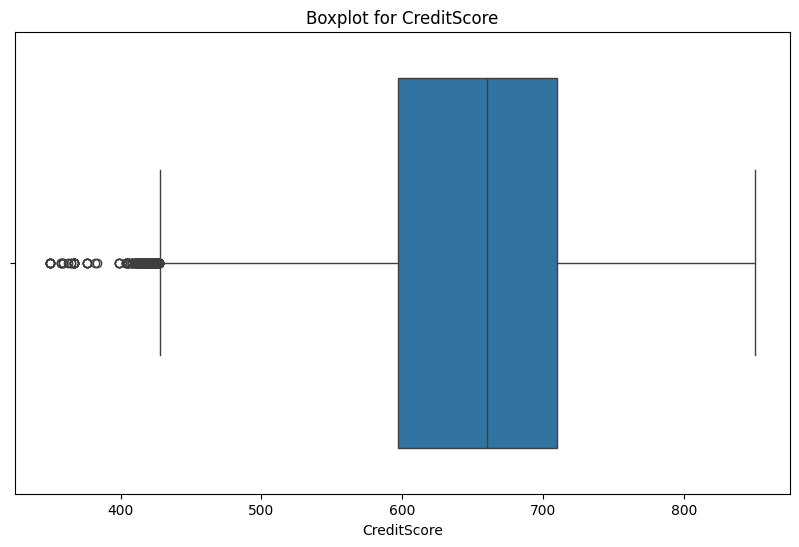

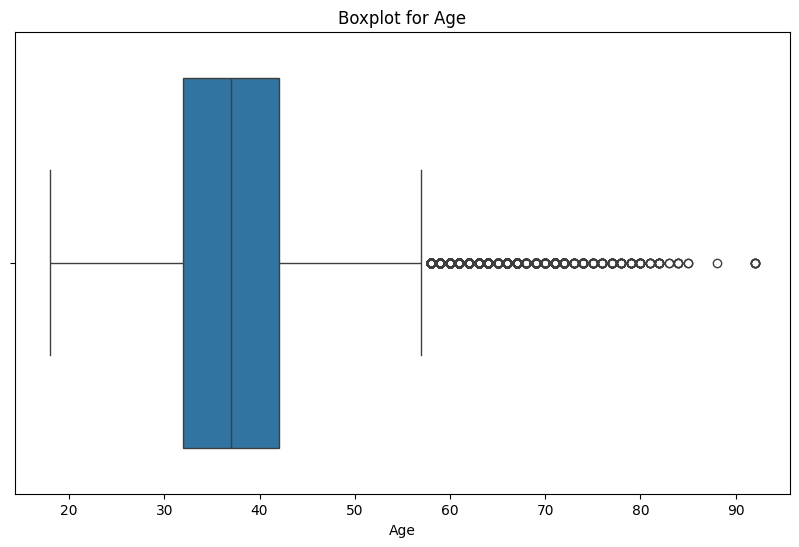

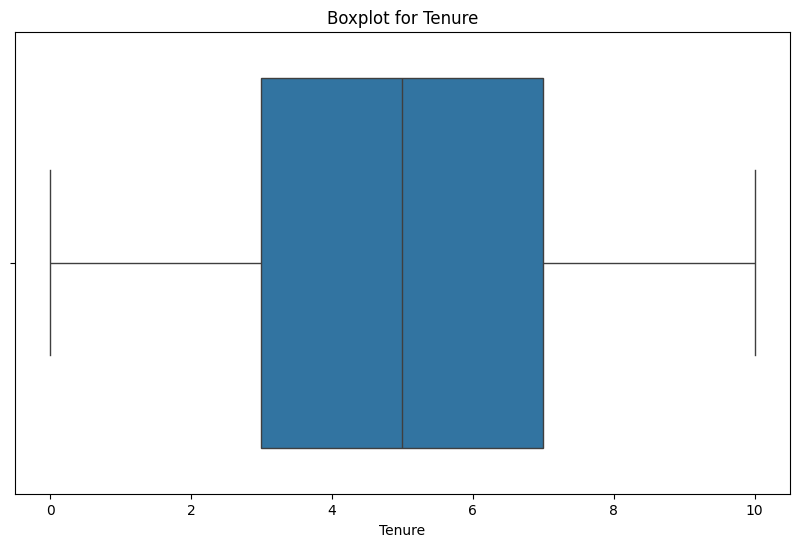

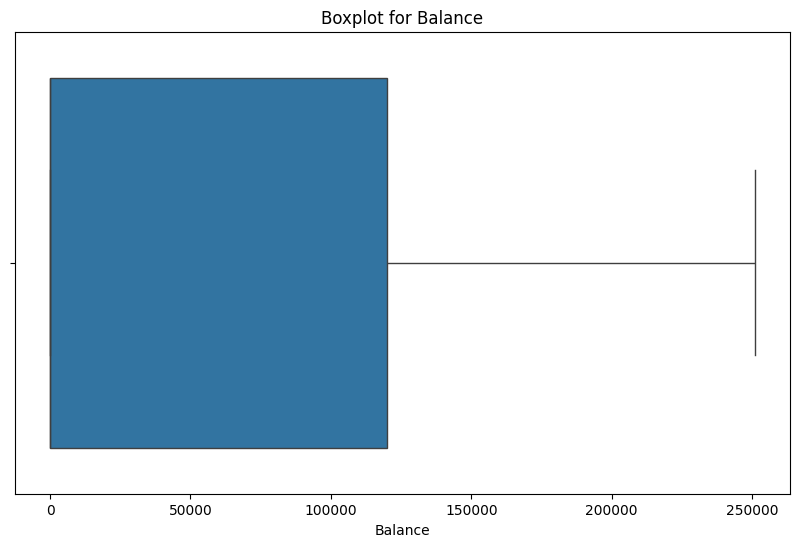

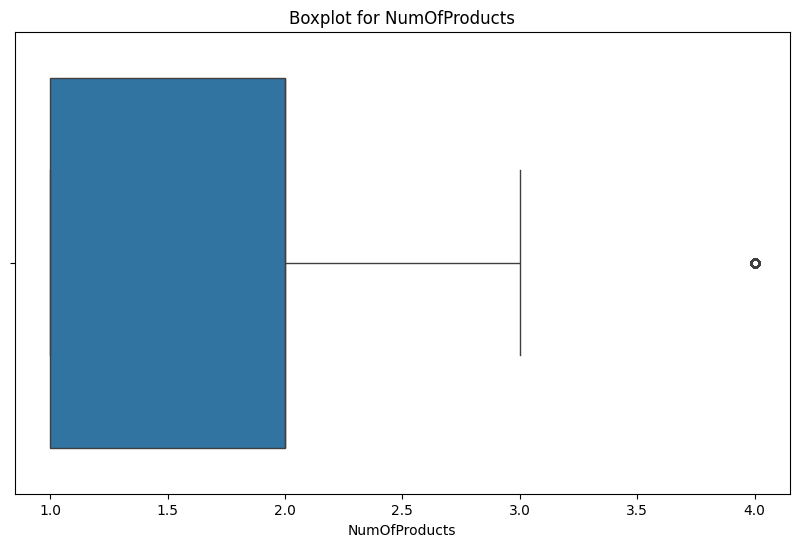

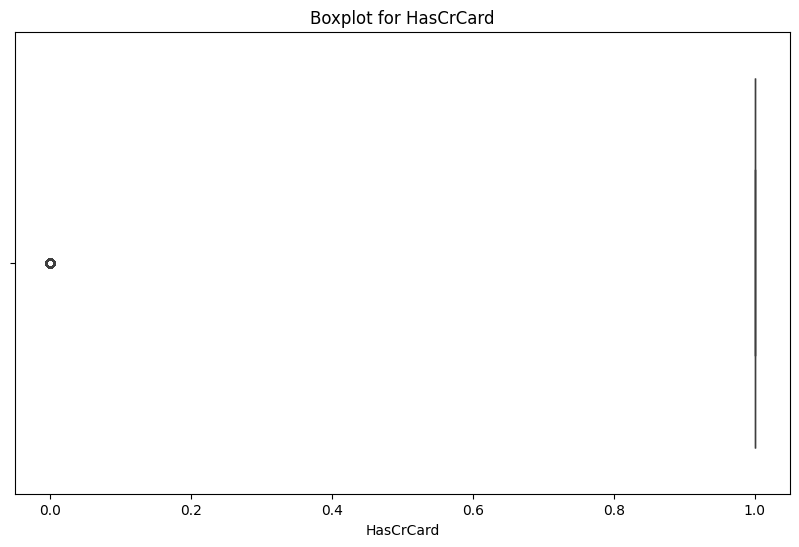

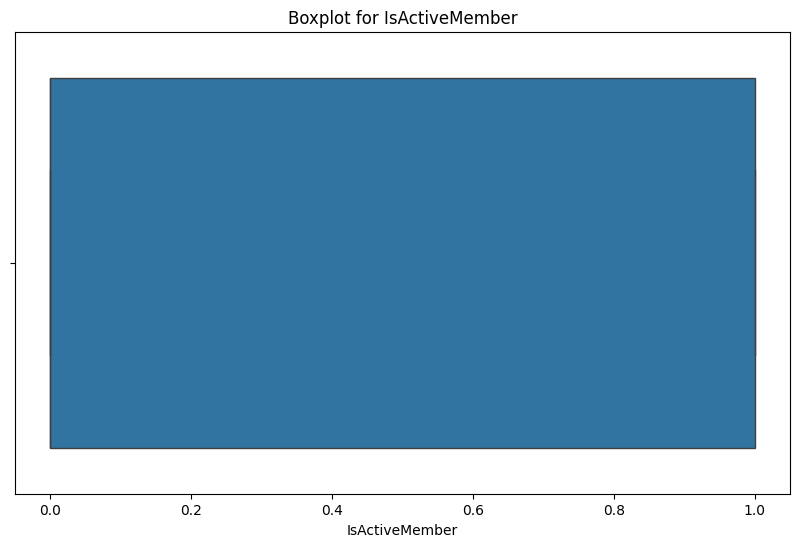

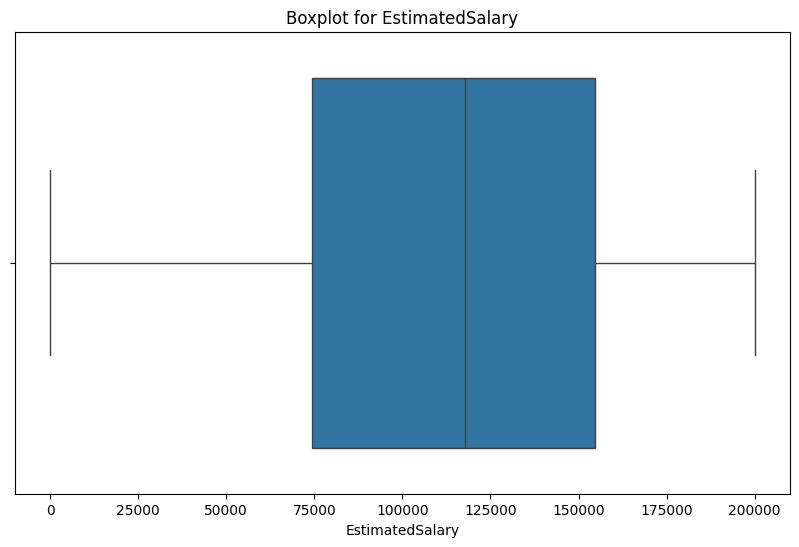

Unique values in Surname: ['Lucchese' 'Nott' 'K?' ... 'Golubova' 'Schoenheimer' 'Distefano']
Unique values in Geography: ['France' 'Germany' 'Spain']
Unique values in Gender: ['Female' 'Male']
Invalid churn entries: Empty DataFrame
Columns: [id, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
Index: []


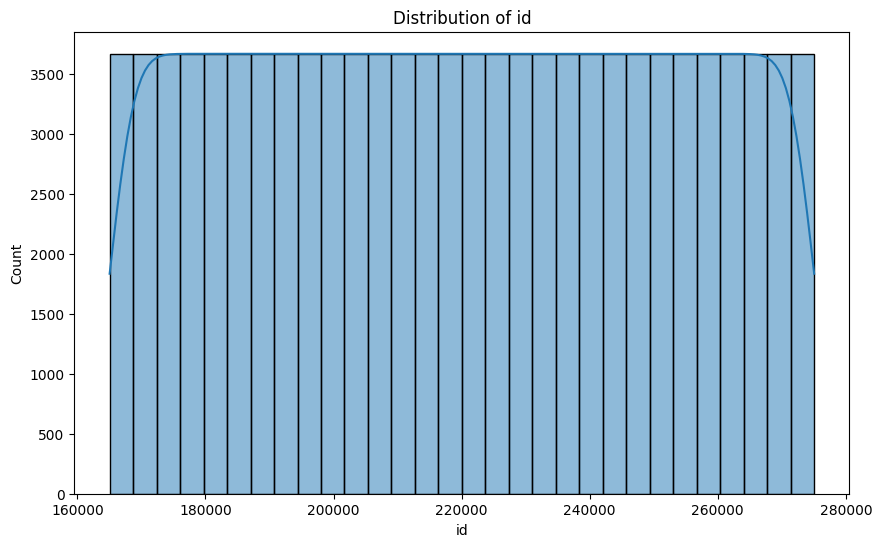

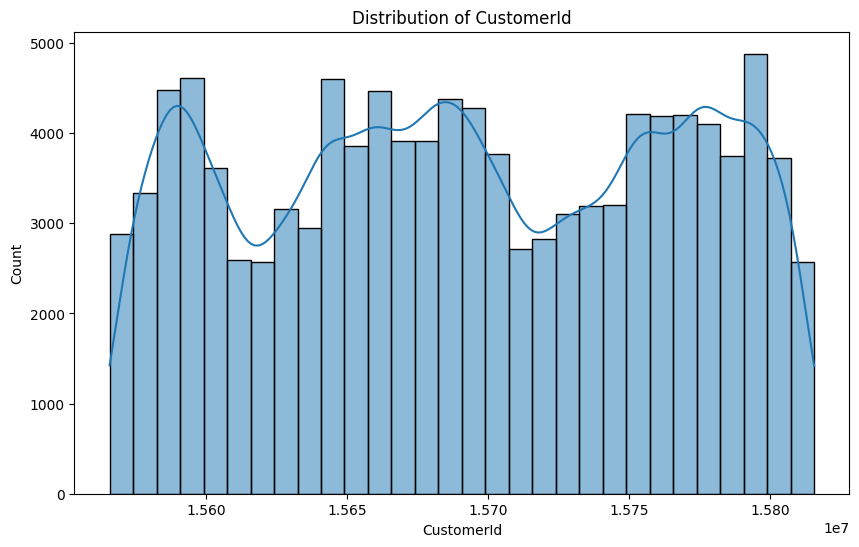

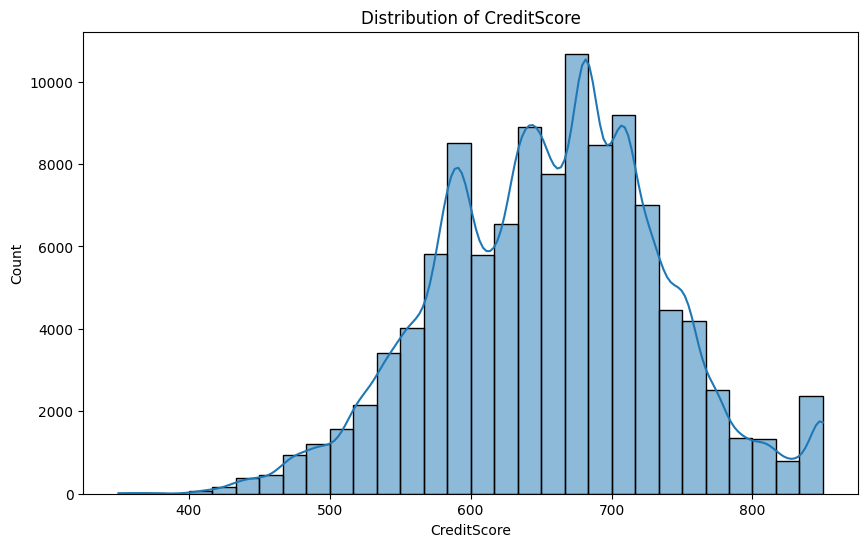

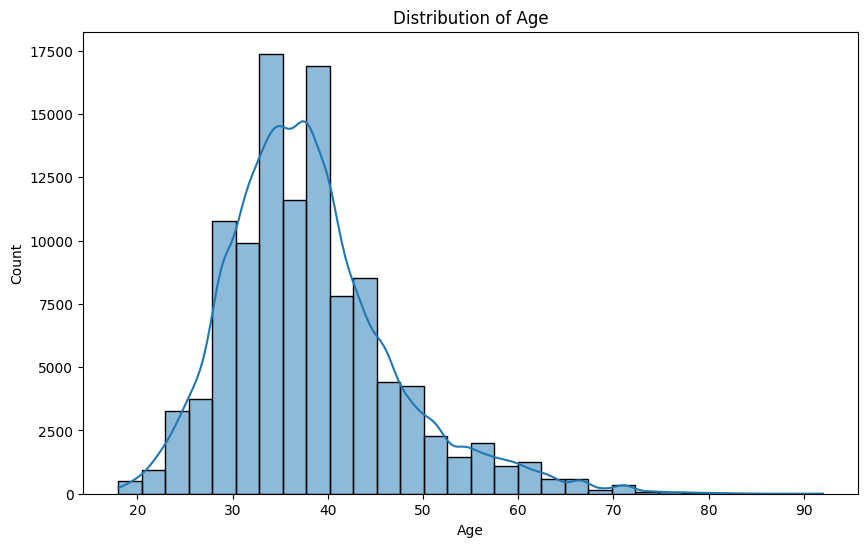

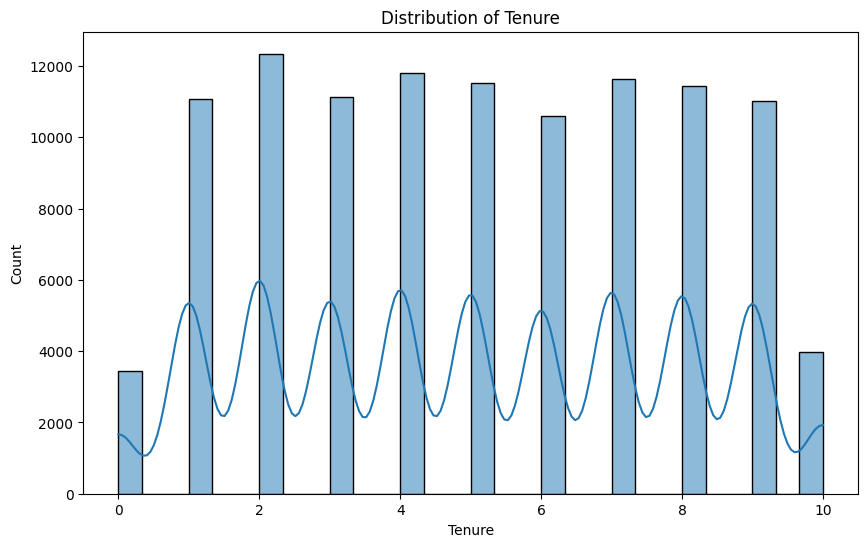

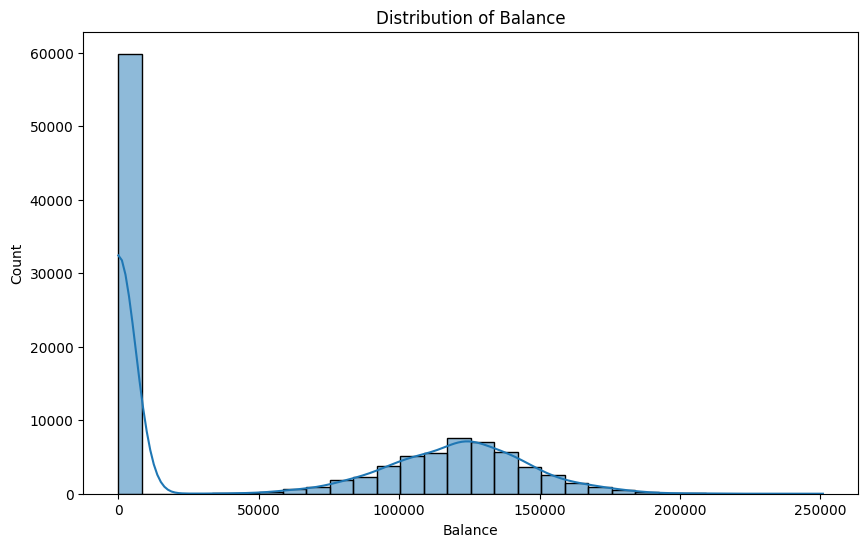

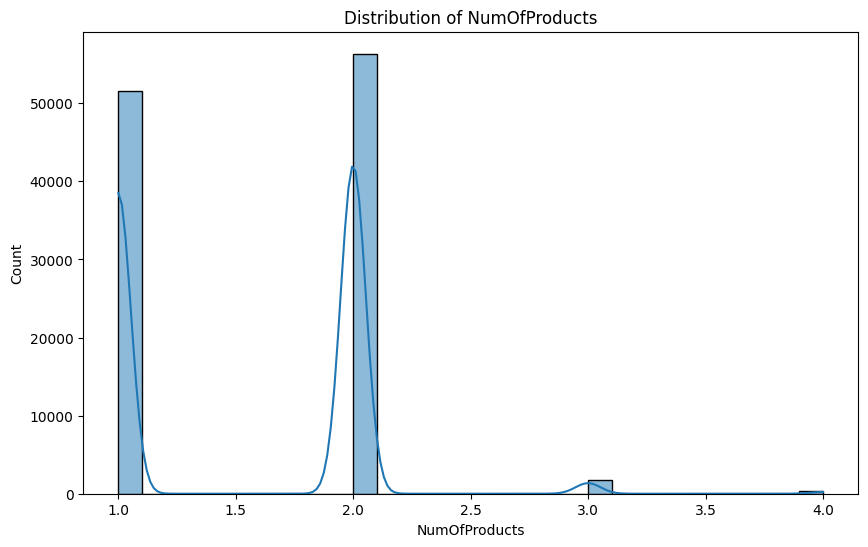

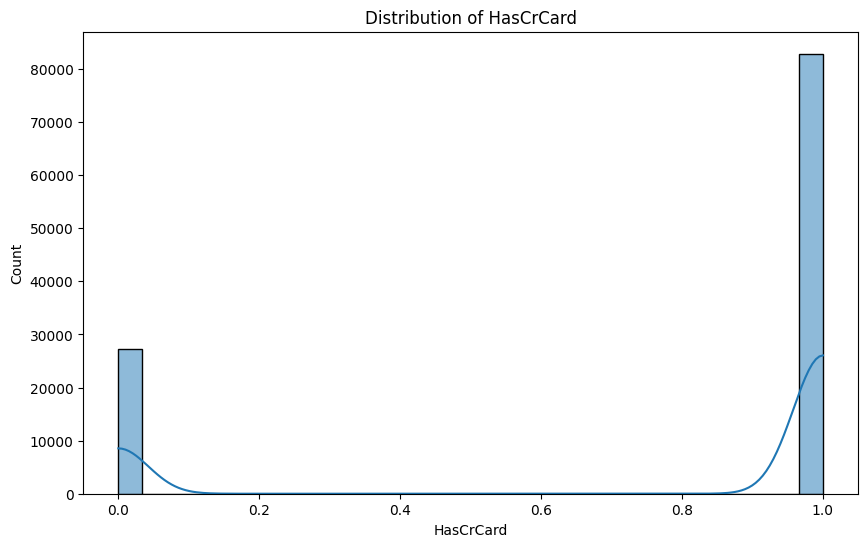

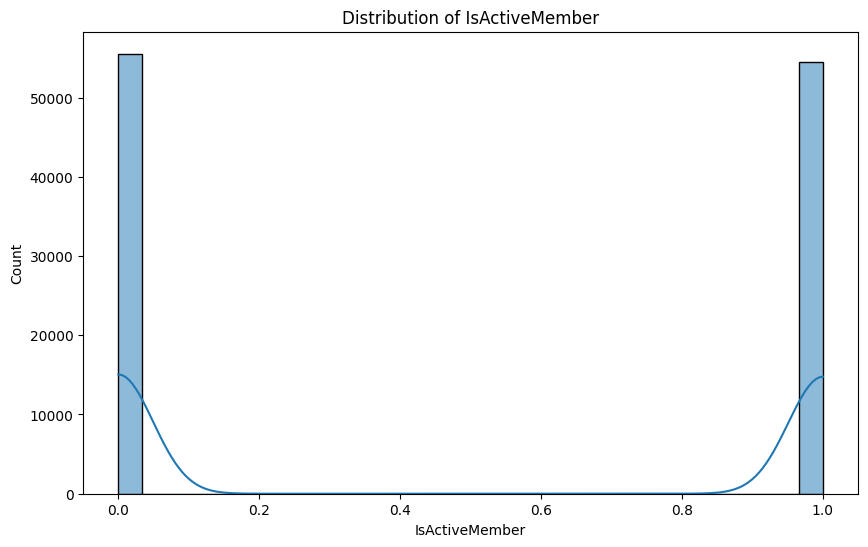

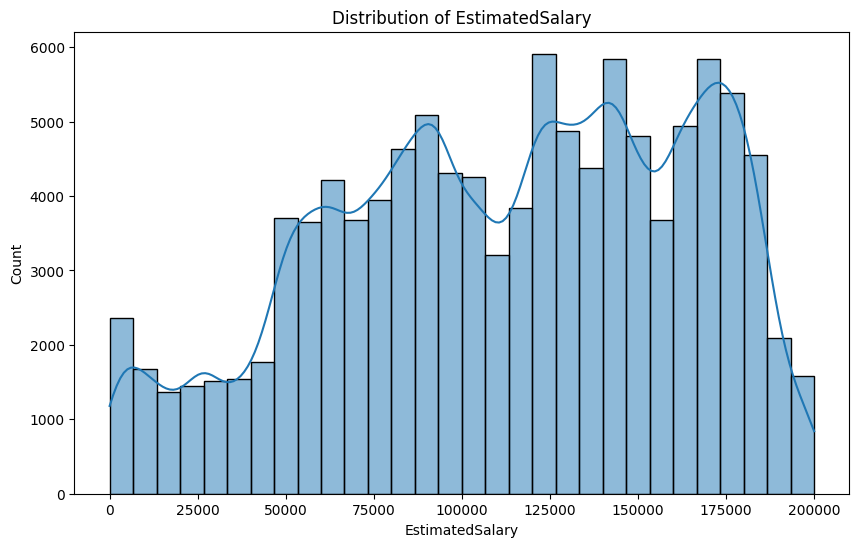

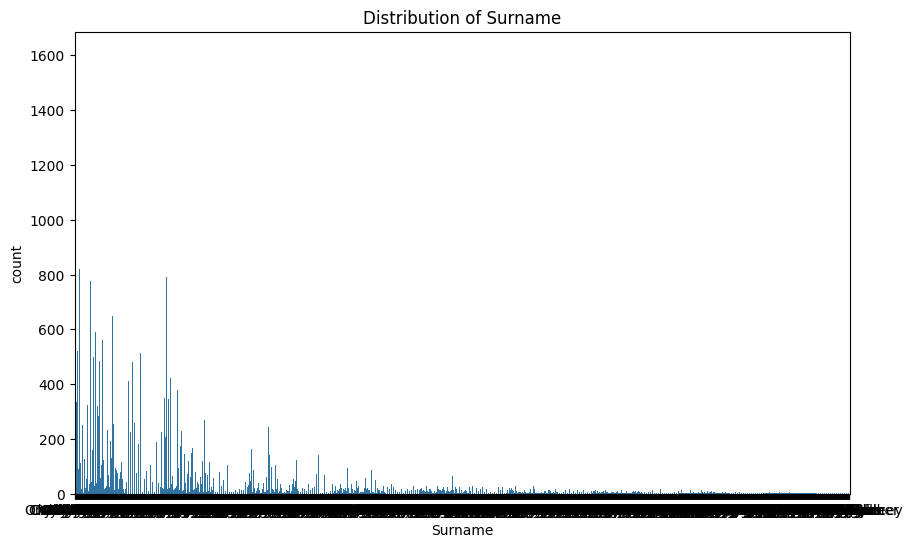

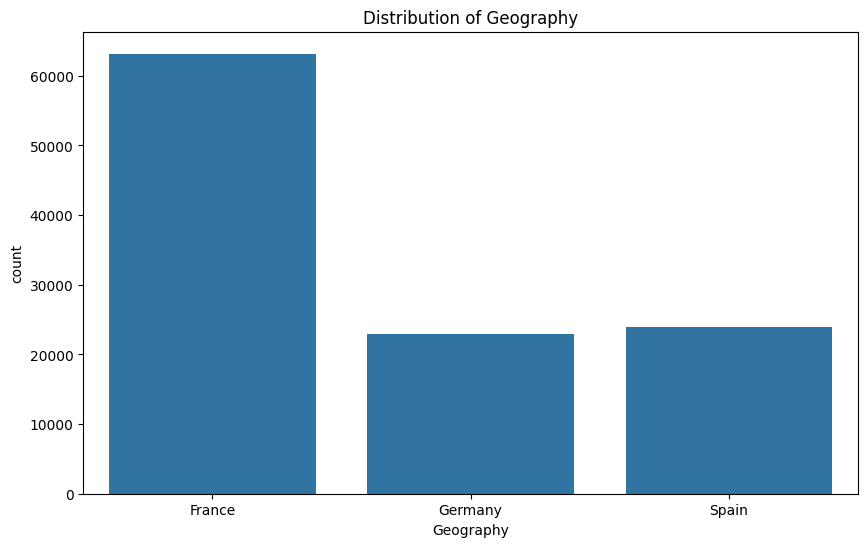

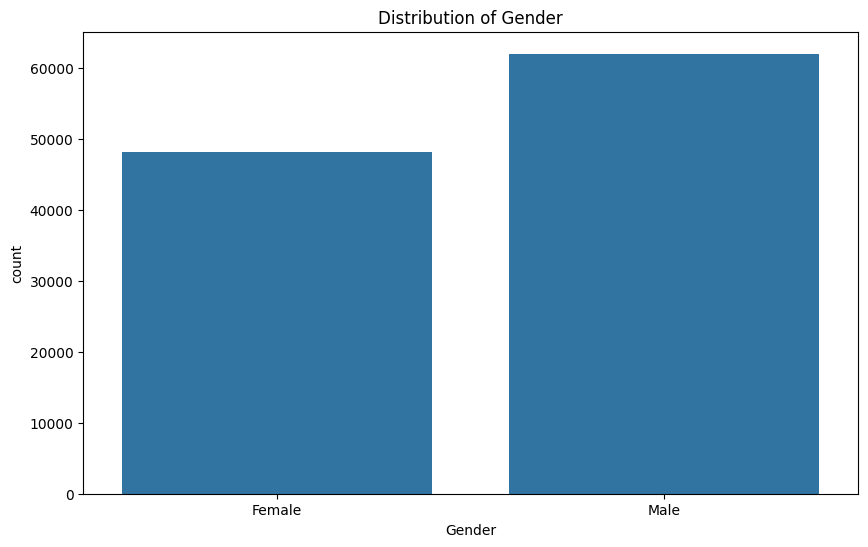

Number of duplicate customer IDs: 90325
Summary of Data Quality Checks:
Missing values per column:
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
Percentage of missing values per column:
id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
dtype: float64
Number of duplicate customer IDs: 90325


In [1]:
import pandas as pd
import os

SOURCE_CSV_FILE = os.path.abspath("./datasets/rangalamahesh_bank_churn.csv")
# Đọc dữ liệu từ file CSV
data = pd.read_csv(SOURCE_CSV_FILE)

# Hiển thị những dòng đầu tiên của dữ liệu
print(data.head())

# Kiểm tra kích thước dữ liệu
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Hiển thị thông tin về dữ liệu
print(data.info())

# Hiển thị các thống kê mô tả
print(data.describe(include='all'))

# Kiểm tra số lượng giá trị bị thiếu trong mỗi cột
missing_values = data.isnull().sum()
print(missing_values)

# Tính toán tỷ lệ giá trị bị thiếu
missing_percentage = (missing_values / data.shape[0]) * 100
print(missing_percentage)

import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ boxplot cho các cột số để phát hiện giá trị ngoại lai
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Kiểm tra các giá trị duy nhất trong các cột phân loại (categorical columns)
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

# Kiểm tra các giá trị hợp lệ cho một số cột nhất định (ví dụ: IsActiveMember)
valid_active_values = [0, 1]  # Ví dụ, chỉ chấp nhận 0 và 1 cho cột IsActiveMember
invalid_active_entries = data[~data['IsActiveMember'].isin(valid_active_values)]
print(f"Invalid churn entries: {invalid_active_entries}")

# Biểu đồ phân phối cho các cột số
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Biểu đồ phân phối cho các cột phân loại
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.show()


# Giả sử bạn có cột 'customer_id' là khóa chính, kiểm tra các giá trị trùng lặp
duplicate_customer_ids = data['CustomerId'].duplicated().sum()
print(f"Number of duplicate customer IDs: {duplicate_customer_ids}")

# Kiểm tra các quan hệ khóa ngoại nếu có
# Ví dụ, nếu có cột 'product_id' trong bảng giao dịch, kiểm tra xem tất cả các giá trị có tồn tại trong bảng sản phẩm không
# product_data = pd.read_csv('path_to_product_file.csv')
# invalid_product_ids = data[~data['product_id'].isin(product_data['product_id'])]
# print(f"Invalid product IDs: {invalid_product_ids}")

# Tổng hợp kết quả và đề xuất
print("Summary of Data Quality Checks:")
print(f"Missing values per column:\n{missing_values}")
print(f"Percentage of missing values per column:\n{missing_percentage}")
print(f"Number of duplicate customer IDs: {duplicate_customer_ids}")
# In các kiểm tra khác nếu có

# Đề xuất cải thiện:
# - Xử lý missing values: sử dụng phương pháp fillna() hoặc loại bỏ hàng/cột chứa nhiều missing values
# - Xử lý outliers: sử dụng các phương pháp như winsorization, transformation, hoặc loại bỏ
# - Kiểm tra và sửa các giá trị không hợp lệ trong các cột phân loại

